#  Определение перспективного тарифа для телеком компании

В данной работе необходимо провести аналииз тарифов Смарт и Ультра и определить наиболее перспективный.

Описание тарифов

__Тариф «Смарт»__

>    Ежемесячная плата: 550 рублей
>    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
>    Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля (телеком компания всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута);  сообщение: 3 рубля; 1 Гб интернет-трафика: 200 рублей.

__Тариф «Ультра»__

>    Ежемесячная плата: 1950 рублей
>    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
>    Стоимость услуг сверх тарифного пакета: минута разговора: 1 рубль; сообщение: 1 рубль; 1 Гб интернет-трафика: 150 рублей.



**Примечание:**

>Телеком компания всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он >длился всего 1 секунду, будет засчитан как 1 минута.
>Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если >абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.



Описания предоставленных таблиц представлены ниже


**Описание данных
Таблица users (информация о пользователях):**

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

**Таблица calls (информация о звонках):**

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Работа будет проходить в несколько этапов
- обработка данных ( на этом этапе произойдет ознакомление с данными)
- подготовка данных ( на этом этапе произойдет исправлнеие, ошибок, типов данных и др.)
- анализ данных (на данном этапе произойдет анализ данных для каждого пользователя тарифа в отдельный месяц и вычиление основных параметров) 

Более детальный порядок работы расположен ниже

<h1>Порядок работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ознакомимся-с-данными" data-toc-modified-id="Ознакомимся-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ознакомимся с данными</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим-подробнее-данные-таблицы-calls" data-toc-modified-id="Рассмотрим-подробнее-данные-таблицы-calls-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Рассмотрим подробнее данные таблицы <em>calls</em></a></span></li><li><span><a href="#Рассмотрим-подробнее-данные-таблицы-internet" data-toc-modified-id="Рассмотрим-подробнее-данные-таблицы-internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассмотрим подробнее данные таблицы <em>internet</em></a></span></li><li><span><a href="#Рассмотрим-подробнее-данные-таблицы-messages" data-toc-modified-id="Рассмотрим-подробнее-данные-таблицы-messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Рассмотрим подробнее данные таблицы <em>messages</em></a></span></li><li><span><a href="#Рассмотрим-подробнее-данные-таблицы-tariffs" data-toc-modified-id="Рассмотрим-подробнее-данные-таблицы-tariffs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Рассмотрим подробнее данные таблицы <em>tariffs</em></a></span></li><li><span><a href="#Рассмотрим-подробнее-данные-таблицы-users" data-toc-modified-id="Рассмотрим-подробнее-данные-таблицы-users-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Рассмотрим подробнее данные таблицы <em>users</em></a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подсчет-количества-завонков-для-кажого-пользователя" data-toc-modified-id="Подсчет-количества-завонков-для-кажого-пользователя-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подсчет количества завонков для кажого пользователя</a></span></li><li><span><a href="#Подсчет-минут-разговора-по-месяцам" data-toc-modified-id="Подсчет-минут-разговора-по-месяцам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подсчет минут разговора по месяцам</a></span></li><li><span><a href="#Подсчет-отправленных-сообщений-по-месяцам" data-toc-modified-id="Подсчет-отправленных-сообщений-по-месяцам-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подсчет отправленных сообщений по месяцам</a></span></li><li><span><a href="#Израсходованный-трафик-интернета-за-месяц" data-toc-modified-id="Израсходованный-трафик-интернета-за-месяц-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Израсходованный трафик интернета за месяц</a></span></li><li><span><a href="#Месячная-выручка" data-toc-modified-id="Месячная-выручка-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Месячная выручка</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Проанализируем-продолжительность-звонков" data-toc-modified-id="Проанализируем-продолжительность-звонков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проанализируем продолжительность звонков</a></span></li><li><span><a href="#Проанализируем-сообщения" data-toc-modified-id="Проанализируем-сообщения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проанализируем сообщения</a></span></li><li><span><a href="#Рассмотрим-интернет" data-toc-modified-id="Рассмотрим-интернет-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рассмотрим интернет</a></span></li><li><span><a href="#Рассмотрим-месячную-вырочку" data-toc-modified-id="Рассмотрим-месячную-вырочку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Рассмотрим месячную вырочку</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Проверка-гиппотез" data-toc-modified-id="Проверка-гиппотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гиппотез</a></span><ul class="toc-item"><li><span><a href="#гиппотеза-средней-вырочки-тарифов" data-toc-modified-id="гиппотеза-средней-вырочки-тарифов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>гиппотеза средней вырочки тарифов</a></span></li><li><span><a href="#Гиппотеза-о-выручки-Москвы-и-регионов" data-toc-modified-id="Гиппотеза-о-выручки-Москвы-и-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гиппотеза о выручки Москвы и регионов</a></span></li></ul></li><li><span><a href="#Итоговый-Вывод" data-toc-modified-id="Итоговый-Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый Вывод</a></span></li></ul></div>

импортируем библиотеки которые буду использоваться в проекте

In [1]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### Ознакомимся с данными 

Загрузим исходные данные которые необходимо будет проанализировать

In [2]:
calls=pd.read_csv('',parse_dates=['call_date'])
internet=pd.read_csv('',index_col=0,parse_dates=['session_date'])
messages=pd.read_csv('',parse_dates=['message_date'])
tariffs=pd.read_csv('')
users=pd.read_csv('',parse_dates=['reg_date','churn_date'])

#### Рассмотрим подробнее данные таблицы _calls_

In [3]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


В данной таблице отсуствуют пропуски, однако очевидно что есть необходимость некоторые данные привести к другим типам данных:
- duration float->int

длительность звонка (duration) необходимо переветси в целочисленный, так как в исходном задании сказано, что время разговоры округляется вверх

In [5]:
calls.duration=np.ceil(calls.duration) 

#### Рассмотрим подробнее данные таблицы _internet_

In [6]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


так как оператор округляет до целых каждый мб, округлим его до целых

In [8]:
internet.mb_used=np.ceil((internet.mb_used))
internet.head(2)

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000


#### Рассмотрим подробнее данные таблицы _messages_

In [9]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


#### Рассмотрим подробнее данные таблицы _tariffs_


In [11]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Рассмотрим подробнее данные таблицы _users_ 

In [13]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


столбец churn_date отражает дату прекращения пользования тарифом. Рассмотрим какие в целом значения хранятся в данном столбце.

In [15]:
users.churn_date.unique()

array([                          'NaT', '2018-10-05T00:00:00.000000000',
       '2018-12-18T00:00:00.000000000', '2018-11-21T00:00:00.000000000',
       '2018-10-03T00:00:00.000000000', '2018-10-14T00:00:00.000000000',
       '2018-12-09T00:00:00.000000000', '2018-12-11T00:00:00.000000000',
       '2018-12-26T00:00:00.000000000', '2018-08-31T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-23T00:00:00.000000000',
       '2018-11-07T00:00:00.000000000', '2018-12-16T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-21T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-09-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-11-13T00:00:00.000000000', '2018-11-22T00:00:00.000000000',
       '2018-10-28T00:00:00.000000000', '2018-11-26T00:00:00.000000000',
       '2018-11-27T00:00:00.000000000', '2018-11-16T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2018-12-30

Можно преположить,что там где пустые значения, значит действие тарифа еще не прекратилось

#### Вывод:

В результате ознакомления с данными была проведена таже и предобработка данных на наличие ошибок и перевод неторых столбцов в более удобные форматы:
- перевод в форматы:
    - таблица calls
        - call_date object->datetime
        - duration float->int
    - internet
        - session_date object->datetime
    - messages
        - message_date object->datetime
    - users
        - reg_date object->datetime
        - churn_date object->datetime
- исправление ошибок
    - таблица internet
        - удаление столбца Unnamed: 0

### Подготовка данных

In [16]:
users['start_month']=pd.DatetimeIndex(users.reg_date).month

#### Подсчет количества завонков для кажого пользователя

Рассмотрим таблицу _calls_

In [17]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [18]:
look_up = {'1': 'jan', '2': 'feb', '3': 'mar', '4': 'apr', '5': 'may',
            '6': 'jun', '7': 'jul', '8': 'aug', '9': 'sep', '10': 'oct', '11': 'nov', '12': 'dec'}

Так как необходимо выделить за каждый месяц, то в таблицу _calls_ добавим новый столбец, который будет отражать месяц звонка

In [19]:
calls['month']=pd.DatetimeIndex(calls.call_date).month
calls.head(2)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8


Для восприятия удобней будет, если месяц будет обозначаться буквенно. Создадим словь, в котором число соотвесвует месяцу и заменим его

In [20]:
match_num_to_mounth={1:'jan',2:'feb', 3: 'mar', 4: 'apr', 5: 'may',
            6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}

In [21]:
calls['month']=calls.apply(lambda x: match_num_to_mounth[x['month']],axis=1)
calls.head(2)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,jul
1,1000_1,2018-08-17,0.0,1000,aug


Создадим сводную таблицу для количества звонков в месяц для каждого пользователя 

In [22]:
calls_count_pivot=calls.pivot_table(
    index=['month','user_id'],values='id',aggfunc='count'
).reset_index()
calls_count_pivot.head(2)


,month,user_id,id
0,apr,1005,101
1,apr,1006,47


Поменяем названия столбцов

In [23]:
calls_count_pivot.columns=['month','user_id','call_count']
calls_count_pivot.head(2)

,month,user_id,call_count
0,apr,1005,101
1,apr,1006,47


Таким образом подсчитано количество звонков для каждого пользователя помесячно

#### Подсчет минут разговора по месяцам

Составим таблицу в которой будет посчитано сумма звонков абонента в каждый месяц. В тех месяцах, которых абонент не был подключен остается пустым (NaN)

In [24]:
calls_duration_pivot=calls.pivot_table(
    index=['month','user_id'],values='duration',aggfunc='sum'
).reset_index()
calls_duration_pivot.head(2)

,month,user_id,duration
0,apr,1005,712.0
1,apr,1006,356.0


Поменяем название столбцов

In [25]:
calls_duration_pivot.columns=['month','user_id','call_duration']
calls_duration_pivot.head(2)


,month,user_id,call_duration
0,apr,1005,712.0
1,apr,1006,356.0


Таким образом подсчитана продолжительность звонков для каждого пользователя помесячно

#### Подсчет отправленных сообщений по месяцам

In [26]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблицу messages добавим столбец месяц

In [27]:
messages['month']=pd.DatetimeIndex(messages.message_date).month
messages.head(2)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10


In [28]:
messages['month']=messages.apply(lambda x: match_num_to_mounth[x['month']],axis=1)

In [29]:
messages_pivot=messages.pivot_table(
    index=['month','user_id'],values='id',aggfunc='count'
).reset_index()
messages_pivot.head(2)

,month,user_id,id
0,apr,1005,41
1,apr,1007,11


In [30]:
messages_pivot.columns=['month','user_id','messages_count']
messages_pivot.head(2)


,month,user_id,messages_count
0,apr,1005,41
1,apr,1007,11


Таким образом подсчитаны сообщения для каждого пользователя помесячно

#### Израсходованный трафик интернета за месяц

In [31]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


В таблицу internet добавим столбец месяц

In [32]:
internet['month']=pd.DatetimeIndex(internet.session_date).month
internet['month']=internet.apply(lambda x: match_num_to_mounth[x['month']],axis=1)

In [33]:
internet_pivot=internet.pivot_table(
    index=['month','user_id'],values='mb_used',aggfunc='sum'
).reset_index()
internet_pivot.head(2)

,month,user_id,mb_used
0,apr,1005,9365.0
1,apr,1006,13954.0


Таким образом подсчитан расход интернета для каждого пользователя помесячно

#### Месячная выручка

Для начала совместим данные

In [34]:
general_data=calls_count_pivot.merge(calls_duration_pivot,
            left_on=['month','user_id'],right_on=['month','user_id'],how='outer')

In [35]:
general_data=general_data.merge(messages_pivot,
            left_on=['month','user_id'],right_on=['month','user_id'],how='outer')

In [36]:
general_data=general_data.merge(internet_pivot,
            left_on=['month','user_id'],right_on=['month','user_id'],how='outer')

In [37]:
general_data=general_data.merge(users.loc[:,['user_id','tariff']],
            left_on='user_id',right_on='user_id',how='outer')

In [38]:
general_data=general_data.merge(tariffs.loc[:,['tariff_name','rub_monthly_fee']],
            left_on='tariff',right_on='tariff_name',how='outer')

In [39]:
general_data.head(10)

,month,user_id,call_count,call_duration,messages_count,mb_used,tariff,tariff_name,rub_monthly_fee
0,apr,1005,101.0,712.0,41.0,9365.0,smart,smart,550
1,aug,1005,71.0,619.0,64.0,7554.0,smart,smart,550
2,dec,1005,84.0,592.0,54.0,8680.0,smart,smart,550
3,feb,1005,69.0,456.0,38.0,7394.0,smart,smart,550
4,jan,1005,15.0,95.0,7.0,2730.0,smart,smart,550
5,jul,1005,77.0,569.0,56.0,7703.0,smart,smart,550
6,jun,1005,80.0,612.0,47.0,9875.0,smart,smart,550
7,mar,1005,77.0,606.0,56.0,11117.0,smart,smart,550
8,may,1005,73.0,595.0,42.0,7877.0,smart,smart,550
9,nov,1005,75.0,547.0,51.0,12682.0,smart,smart,550


Удалим столбцы который дублируется(tariff_name)

In [40]:
general_data.drop(['tariff_name'],axis=1)

,month,user_id,call_count,call_duration,messages_count,mb_used,tariff,rub_monthly_fee
0,apr,1005,101.0,712.0,41.0,9365.0,smart,550
1,aug,1005,71.0,619.0,64.0,7554.0,smart,550
2,dec,1005,84.0,592.0,54.0,8680.0,smart,550
3,feb,1005,69.0,456.0,38.0,7394.0,smart,550
4,jan,1005,15.0,95.0,7.0,2730.0,smart,550
...,...,...,...,...,...,...,...,...
3211,sep,1473,NaN,NaN,19.0,17307.0,ultra,1950
3212,dec,1328,NaN,NaN,7.0,39461.0,ultra,1950
3213,nov,1328,NaN,NaN,8.0,35567.0,ultra,1950
3214,oct,1328,NaN,NaN,6.0,22447.0,ultra,1950


После такого крупного объеденияния, могут возникнуть пустые занчения, проверим на их наличие

In [41]:
general_data.isna().sum()

month                2
user_id              0
call_count          42
call_duration       42
messages_count     499
mb_used             13
tariff               0
tariff_name          0
rub_monthly_fee      0
dtype: int64

наиболее критичны в данном случае пропущеннные данные для месяца month,данные строки придется удалить, потому что они в данном случае не будут нести нужной информации. с другими строками другая ситуация, в данных строках может быть NaN из за того, что клиенты не пользовались этим категориями, поэтому их можно заменить просто на 0

In [42]:
general_data=general_data.dropna(subset=['month'])
general_data.head(2)

,month,user_id,call_count,call_duration,messages_count,mb_used,tariff,tariff_name,rub_monthly_fee
0,apr,1005,101.0,712.0,41.0,9365.0,smart,smart,550
1,aug,1005,71.0,619.0,64.0,7554.0,smart,smart,550


In [43]:
general_data=general_data.fillna(0)

In [44]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 9 columns):
month              3214 non-null object
user_id            3214 non-null int64
call_count         3214 non-null float64
call_duration      3214 non-null float64
messages_count     3214 non-null float64
mb_used            3214 non-null float64
tariff             3214 non-null object
tariff_name        3214 non-null object
rub_monthly_fee    3214 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 251.1+ KB


посчитаем прибль от звонков

Для этого создадим функцию, которая будет высчитаывать прибыль с каждой категории услуг

In [45]:

def profit(row,discover_columns,rules,over_rules):
    """
    функция вычитает результат выручки за определенный столбец
    Функция принимает значение строки row
    discover_columns обозначие столбец по которому производить вычисления выручки
    rules объем исследуемого параметра включенноого в тариф
    over_rules цена за превышение
    """
    
    values=row[discover_columns] #значение для которого считается прибыль
    
    user=row['user_id'] #вычисляется индивидуальный номер
    tarif=row['tariff'] #находится номер
    included=tariffs.query('tariff_name==@tarif')[rules] #значение включенное в тариф
    
     
    
   
    price_over_included=tariffs.query('tariff_name==@tarif')[over_rules] #значение сверх включенное в тариф
    
    remains=int(included-values) #остаток от тарифа
    
#     дальше идет условие,  что если остако больше нуля, то прибыли нет
#     возвращается 0. иначе, вводится еще одно условие, что если значение для
#     значение для которого считается прибыль отноится к интернету, то
#     прибыль высчитаевается особым способом, так  как остаток считается уже не
#     по мегабайту, а по гигабайту с округдением в большую сторону. для всех других 
#     реузльтатов счатется так же по изначальным единицам
    
    if remains>=0:
        return 0
    elif discover_columns=='mb_used':
        return int(np.ceil(-remains/1024)*price_over_included)
    return int(-remains*price_over_included)

In [46]:
general_data['call_profit']=general_data.apply(
lambda row:profit(row,'call_duration',
                  'minutes_included','rub_per_minute'),axis=1)

Посчитаем прибыль от сообщений

In [47]:
general_data['message_profit']=general_data.apply(
lambda row:profit(row,'messages_count',
                  'messages_included','rub_per_message'),axis=1)

Посчитаем прибыль от интернета

In [48]:
general_data['internet_profit']=general_data.apply(
lambda row:profit(row,'mb_used',
                  'mb_per_month_included','rub_per_gb'),axis=1)

In [49]:
general_data.head(2)

,month,user_id,call_count,call_duration,messages_count,mb_used,tariff,tariff_name,rub_monthly_fee,call_profit,message_profit,internet_profit
0,apr,1005,101.0,712.0,41.0,9365.0,smart,smart,550,636,0,0
1,aug,1005,71.0,619.0,64.0,7554.0,smart,smart,550,357,42,0


Посчитаем итоговую прибыль

In [50]:
general_data['total_profit']=(
    general_data.rub_monthly_fee+
    general_data.call_profit+
    general_data.message_profit+
    general_data.internet_profit)
general_data.query('tariff_name=="ultra"').head(2)

,month,user_id,call_count,call_duration,messages_count,mb_used,tariff,tariff_name,rub_monthly_fee,call_profit,message_profit,internet_profit,total_profit
2230,apr,1018,85.0,636.0,34.0,5627.0,ultra,ultra,1950,0,0,0,1950
2231,aug,1018,115.0,929.0,20.0,8650.0,ultra,ultra,1950,0,0,0,1950


#### Вывод:

В результате просчиатны и подготовлены данные звонков, сообщений и интернета для дальнейшего анализа

### Анализ данных

#### Проанализируем продолжительность звонков

Создадим функцию, которая будет выводить значения для сравнения статистических величин(среднего значения, стандартного отклонения, и дисперсия)

In [51]:
def func(column):
    table=general_data.pivot_table(
    index='tariff',values=column
    ,aggfunc=['mean','std']).reset_index()
    
    table.columns=['tariff','mean','std']
    
    table.loc[0,'disp']=np.var(
        general_data.query('tariff=="smart"')[column],
        ddof=1)
    
    table.loc[1,'disp']=np.var(
        general_data.query('tariff=="ultra"')[column],
        ddof=1)
    
    return table

In [52]:
stat_call_duration=func('call_duration')
stat_call_duration

,tariff,mean,std,disp
0,smart,417.934948,190.313730,36219.315784
1,ultra,526.623350,317.606098,100873.633397


В результате расчета можно сказать, что среднее значение у двух тарифов примерно одинаковые, однако заметно отличаются стандартное отклонение и дисперсия. Рассмотрим эти значения графически

построим гистаграмму распределние звонков для тарифа смарт и ультра

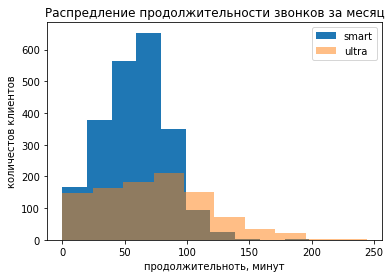

In [53]:
hist=(general_data.
      query('tariff=="smart"').
      plot(kind='hist',y='call_count'))
(general_data.
     query('tariff=="ultra"').
     plot(kind='hist',y='call_count',ax=hist,alpha=0.5))
plt.title('Распредление продолжительности звонков за месяц')
plt.xlabel('продолжительноть, минут')
plt.ylabel('количестов клиентов')

plt.legend(labels=['smart','ultra'])
plt.show()



Судя по графику можно сказать, что дейтсвительно среднее значение примерно одинаковое по продолжеительнотси звонков, однако, тарифом смарт пользуется большее количество человек.

#### Проанализируем сообщения

In [54]:
stat_message=func('messages_count')
stat_message

,tariff,mean,std,disp
0,smart,33.384029,28.227876,796.812958
1,ultra,49.363452,47.804457,2285.266143


В результате расчета можно сказать, что среднее значение у двух тарифов примерно одинаковые, однако заметно отличаются стандартное отклонение и дисперсия. Рассмотрим эти значения графически

In [55]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


построим гистаграмму сообщений для тарифа смарт и ультра

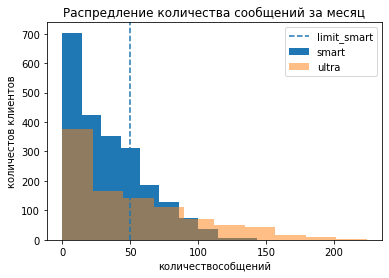

In [56]:
hist=(general_data.
      query('tariff=="smart"').
      plot(kind='hist',y='messages_count'))
(general_data.
     query('tariff=="ultra"').
     plot(kind='hist',y='messages_count',ax=hist,alpha=0.5))
plt.title('Распредление количества сообщений за месяц')
plt.xlabel('количествособщений')
plt.ylabel('количестов клиентов')
plt.axvline(x=50, linestyle='--')

plt.legend(labels=['limit_smart','smart','ultra'])
plt.show()


Как видно из данного графика клиентам тарифа Smart очень часто не хватает включенных в тариф сообщенийи они очень часто переполняют лимит. Однако пользоватнели тарифа Ultra не переплачивают и не переполяют включенные в тариф сообщения

#### Рассмотрим интернет

In [57]:
stat_internet=func('mb_used')
stat_internet

,tariff,mean,std,disp
0,smart,16229.188425,5877.576978,3.454591e+07
1,ultra,19486.901523,10096.317202,1.019356e+08


In [58]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


построим гистаграмму трафика для тарифа смарт и ультра

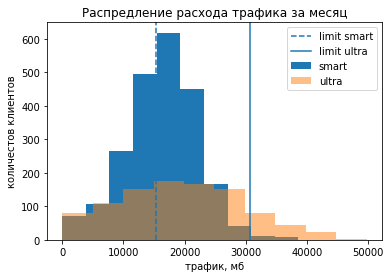

In [59]:
hist=(general_data.
      query('tariff=="smart"').
      plot(kind='hist',y='mb_used'))
(general_data.
     query('tariff=="ultra"').
     plot(kind='hist',y='mb_used',ax=hist,alpha=0.5))
plt.title('Распредление расхода трафика за месяц')
plt.xlabel('трафик, мб')
plt.ylabel('количестов клиентов')
plt.axvline(x=15360, linestyle='--')
plt.axvline(x=30720, linestyle='-')

plt.legend(labels=['limit smart','limit ultra','smart','ultra'])
plt.show()


Так же как и с сообщениями клиентам тарифа Smart очень часто не хватает включенных в тариф мб . Однако пользоватнели тарифа Ultra тоже переплачивают, но не так часто. 

#### Рассмотрим месячную вырочку

In [60]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 13 columns):
month              3214 non-null object
user_id            3214 non-null int64
call_count         3214 non-null float64
call_duration      3214 non-null float64
messages_count     3214 non-null float64
mb_used            3214 non-null float64
tariff             3214 non-null object
tariff_name        3214 non-null object
rub_monthly_fee    3214 non-null int64
call_profit        3214 non-null int64
message_profit     3214 non-null int64
internet_profit    3214 non-null int64
total_profit       3214 non-null int64
dtypes: float64(4), int64(6), object(3)
memory usage: 351.5+ KB


In [61]:
stat_total_profit=func('total_profit')


In [62]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


построим гистаграмму сообщений для тарифа смарт и ультра

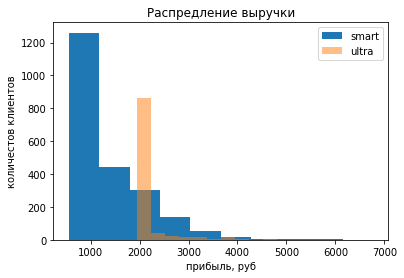

In [63]:
hist=(general_data.
      query('tariff=="smart"').
      plot(kind='hist',y='total_profit'))
(general_data.
     query('tariff=="ultra"').
     plot(kind='hist',y='total_profit',ax=hist,alpha=0.5))
plt.title('Распредление выручки')
plt.xlabel('прибыль, руб')
plt.ylabel('количестов клиентов')
# plt.axvline(x=15360, linestyle='--')
# plt.axvline(x=30720, linestyle='-')

plt.legend(labels=['smart','ultra'])
plt.show()


#### Вывод:


Тариф ультра выходит более стаблилен по цене, так и его клиенты гораздо реже выходят за рамки обговоренной суммы, клиентам тарифа смарт приходится очень часто переплачивать.

### Проверка гиппотез

#### гиппотеза средней вырочки тарифов

Выдвинем гиппотезу, что средняя выручка с пользователей тарифа смарт меньше чем ультра. Нулевая теория такая, что средние значенивыруски одинаковое, а альтернативная, что выручка смарт меньше чем ультра

In [64]:
alpha=0.05

In [65]:
ultra=general_data.query('tariff=="ultra"')['total_profit']
smart=general_data.query('tariff=="smart"')['total_profit']

In [66]:
result_gip1=st.ttest_ind(ultra,smart)
if ((result_gip1.pvalue<alpha/2) and (smart.mean()<ultra.mean())):
    display('Отвергаем нулевую теорию')
else:
    display('Принимаем нулевую теорию')
print('p value=',result_gip1.pvalue)

'Отвергаем нулевую теорию'

p value= 2.9776448000521676e-158


Отвергаем нулевую теорию в пользу альтернативной, что средняя выручка смарта меньше чем ультра

#### Гиппотеза о выручки Москвы и регионов

Гиппотеза звучит так: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [67]:
users.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,start_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11


In [68]:
gip2=general_data.merge(users.loc[:,['user_id','city']],
            left_on='user_id',right_on='user_id',how='outer').dropna()

Создадим отдельные значения таблиц для жителей регионов и москвы

In [69]:
#UPD Передал значение в выборуку не срденее а общее значение
profit_moscow=gip2.query('city=="Москва"')['total_profit']
profit_region=gip2.query('city!="Москва"')['total_profit']

Выдвеним нулевую теорию, что средняя выручка пользователей из Москвы и регионов одинаковая, а альтернативная вырочка в городе Москва не равна регионам

In [70]:
result_gip2=st.ttest_ind(profit_moscow,profit_region)
if (result_gip2.pvalue<alpha):
    display('Отвергаем нулевую теорию')
else:
    display('Принимаем нулевую теорию')

'Принимаем нулевую теорию'

In [71]:
result_gip2.pvalue

0.531666503831252

Следовательно мы принмаем нулевую теорию, а значит средняя выручка в Москве и в регионах одинаковая

### Итоговый Вывод

В результате проделаной работы, было выявлено, что клиентам тарифа смарт очень часто необходимо переплачиать за свой тариф, так как пармаетров включенных в их тариф часто оказывается недостаточно. не смотря на то, что кольчество пользователей у тарифа Смарт больше,но все равно средняя выручка тарифа ультра больше. Это мы смогли подтверждено статистическим анализом.
Так же стоит отметить,  что выручка не зависит от регионов и Москвы.
Следовательно стоит отметить, что наиболее перспективным тарифом является тариф ультра, если увеличить количество пользователей, то и выручка вырастет. А с тарифом Смарт нужно предпринять какие либо действия, помимо того, что он приносит малую прибыль, клиентом также приходится очень часто переплачивать за свой тариф, что наврядли на долго сможет удержать их на этом тарифе.